# Aeroelastic Polar and Torsional Divergence of a 2D Airfoil Section

---

Hello! Welcome to **Introduction to Aeroelastic Instabilities with Jupyter Notebooks**. This is a practical, hands-on module designed for a 6-hour PhD short course taught by Francesco M. A. Mitrotta at **Politecnico di Bari** in January 2026. The course is intended for doctoral students from diverse engineering backgrounds, you don't need prior advanced aerospace engineering knowledge! We assume only basic knowledge of mechanics (forces, moments, springs) and some familiarity with differential equations. If you're comfortable with the concept of equilibrium and Hooke's law, you're ready to start.

This practical module takes a computational approach to understanding aeroelastic phenomena. Rather than spending lectures on mathematical derivations, we'll use Python and Jupyter notebooks to visualize and explore aeroelastic instabilities. The course follows a "learn by doing" philosophy, and students who don't know Python will learn as we work through the notebooks together.

This Jupyter notebook will guide you through the fundamentals of aeroelastic coupling using the **typical section model**. We'll start by deriving the aeroelastic polar, in other words how the lift force is affected by the elastic deformation of the wing, and build the foundation for understanding critical phenomena like **divergence** and **flutter**. We're going to start with physical intuition and concrete examples. Don't worry if you don't grasp every mathematical detail immediately; we'll progressively build understanding through interactive visualizations and hands-on exploration.

For best results, after you work through this notebook, experiment with the interactive widgets, modify the parameters, and observe how the system behavior changes. Try to develop physical intuition before moving to the next topic.

To execute this Notebook, we assume you're running it through Binder or Google Colab, or that you have invoked the notebook server using: `jupyter notebook`.

## Learning Objectives

---

By the end of this notebook, you will be able to:

1. Understand the basic components of a typical aeroelastic section (airfoil geometry, elastic axis, aerodynamic forces)
2. Derive the equilibrium equation for a wing section with torsional elasticity using moment balance
3. Compute and visualize the **aeroelastic polar**: how the elastic deformation angle varies with flight speed
4. Recognize how the position of the elastic axis relative to the aerodynamic center determines the system behavior
5. Identify the critical question: *What happens when we increase the flight speed further?*

## Introduction: What is Aeroelasticity?

---

**Aeroelasticity** is the study of the interaction between:
- **Aerodynamic forces** (generated by airflow over a structure)
- **Elastic forces** (due to structural flexibility)
- **Inertial forces** (due to mass and acceleration)

In this notebook, we'll focus on a **static aeroelastic problem** where there is no acceleration, thus no inertial forces, and we have a balance between aerodynamic and elastic forces.

### A Simple Example: Why Aircraft Wings Twist

When an aircraft flies, the wings generate lift. This lift creates forces and moments that can **twist** the wing. Because the wing is elastic (not perfectly rigid), it deforms. This deformation changes the angle at which the wing meets the airflow, which in turn changes the aerodynamic forces. 

This is a **feedback loop**: 
- Aerodynamic forces → Elastic deformation
- Elastic deformation → Changed aerodynamics
- Changed aerodynamics → Different forces

In a static aeroelastic problem (no acceleration), we seek an equilibrium where the aerodynamic forces and elastic forces balance out.

Understanding this coupling is essential to analyze aeroelastic instabilities.

## 1. Aerodynamic Model: Lift on an Airfoil

---

Let's start by modeling the aerodynamic forces on a 2D airfoil section. This represents a slice through an aircraft wing, perpendicular to the span direction. Schematically, we can represent the airfoil immersed in a uniform airflow with a given velocity $V$ and at a given angle of attack $\alpha$. This configuration generates an aerodynamic force which can be decomposed into **lift** ($L$) and **drag** ($D$) components, respectively perpendicular and parallel to the incoming flow direction.

<figure>
<img src="../figures/01_airfoil.png" style="width:100%">
<figcaption align = "center"> Airfoil and resultant forces, reproduced from https://mwi-inc.com/blog-post/what-is-an-airfoil-and-whats-its-purpose/. </figcaption>
</figure>

In many conditions the lift force is much larger than the drag force, and for the purpose of our study we can neglect drag and focus on lift. Therefore, we need to model how much lift the airfoil generates.

We'll use **thin airfoil theory** with the following assumptions:

1. **Incompressible flow**: Air density $\rho$ is constant (valid at low Mach numbers, M < 0.3)
2. **Steady flow**: No time-varying effects (static analysis)
3. **Thin airfoil**: Thickness is small compared to chord
4. **Small angles**: Angle of attack $\alpha$ is small (linear regime)
5. **2D flow**: Infinite span (no 3D effects)

According to this theory, the lift force on the airfoil section is given by:

$$
l = \frac{1}{2} \rho v^2 c c_l
$$

where:
- $\rho$ = air density (kg/m³)
- $v$ = flight velocity (m/s)
- $c$ = airfoil chord length (m)
- $c_l$ = sectional lift coefficient (dimensionless)

We often use the **dynamic pressure**:

$$
q = \frac{1}{2} \rho v^2
$$

This represents the kinetic energy per unit volume of the airflow. With this definition the lift equation becomes:

$$
l = q c c_l
$$

### What is the Lift Coefficient?

The **sectional lift coefficient** ($c_l$) is a dimensionless number that relates the lift generated by an airfoil to the dynamic pressure and the reference chord length. It depends on the airfoil shape and the angle of attack $\alpha$, that is to say the angle between the chord line and the incoming flow (there are other dependencies such as Reynolds and Mach number, but for our study we can neglect those). Thin airfoil theory gives us a linear relationship with $\alpha$:

$$
c_l = c_{l\alpha} \alpha
$$

where $c_{l\alpha}$ is the lift curve slope ($\partial c_l$/$\partial\alpha$), in rad $^{-1}$. For the thin airfoil theory, we have $c_{l\alpha} = 2\pi$ rad $^{-1}$.

Given a fixed dynamic pressure (so fixed air density and velocity) and chord length, we can see that the lift varies linearly with angle of attack:

$$
l = q c c_{l\alpha} \alpha
$$

Let's now visualize this linear relationship.

First we import a couple of libraries.
- `numpy` for numerical calculations with vector and matrices (providing functionalities similar to MATLAB)
- `matplotlib` for plotting graphs

In [18]:
import numpy as np
import matplotlib.pyplot as plt
# Remember that using the import-as syntax allows us to use shorter names for the libraries

# This line enables interactive plots in Jupyter notebooks
%matplotlib widget

First let's visualize the values of $c_l$ predicted by thin airfoil theory as a function of angle of attack $\alpha$ (in degrees). However, we need to remind ourselves that we have assumed small angles of attack for thin airfoil theory to be valid. So, before plotting the lift coefficient as a function of angle of attack, it makes sense to ask ourselves: *What is a "small" angle of attack?* To visualize this, we can plot the cosine function. The idea is that for small angles, the cosine is close to 1, and the farer the cosine deviates from 1, the less valid our small angle assumption becomes.

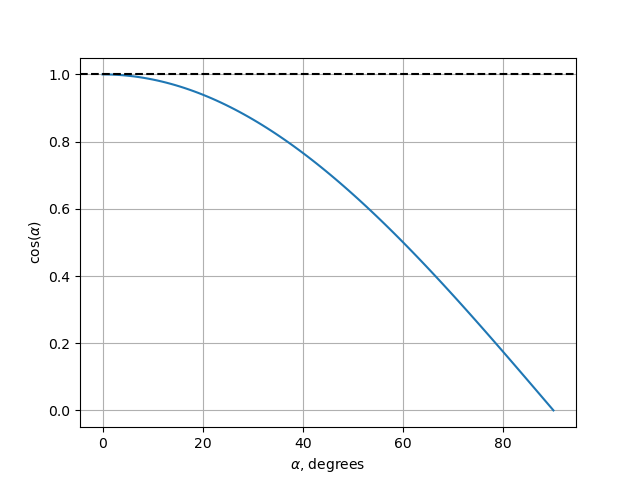

In [19]:
# Define a range of angles from 0 to 90 degrees
angles_deg = np.linspace(0, 90, 100)

# Convert angles to radians (numpy trigonometric functions use radians!)
angles_rad = np.radians(angles_deg)

# Calculate cosine values
cos_values = np.cos(angles_rad)

# Create figure and plot the cosine function
plt.figure()
plt.plot(angles_deg, cos_values)
    
# Add horizontal black line at y=1
plt.axhline(y=1, color='k', linestyle='--')

# Add axis labels, grid, and show the plot
plt.xlabel('$\\alpha$, degrees')  # we can use LaTeX syntax within the $...$ for math
plt.ylabel('$\\cos(\\alpha)$')
plt.grid(True)
plt.show()

If we want to stay within 2% deviation from 1 (careful, this 2% is totally arbitrary!), we can consider angles up to about 12 degrees. Let's define a range of angles of attack between -12 and +12 degrees, computed the corresponding lift values, and plot the results.

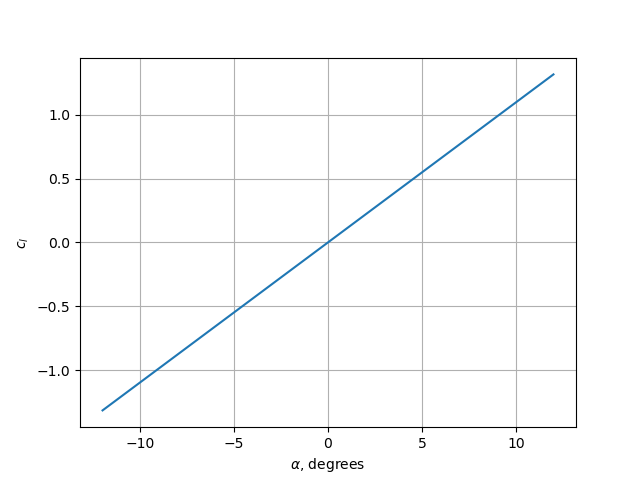

In [20]:
# Define range of angles of attack from -12 to +12 degrees
alpha_deg = np.linspace(-12, 12, 100)

# Convert angles to radians
alpha_rad = np.radians(alpha_deg)

# Define lift curve slope for thin airfoil
c_l_alpha = 2 * np.pi  # per radian

# Calculate lift coefficient
c_l = c_l_alpha * alpha_rad

# Create figure and plot lift coefficient vs angle of attack
plt.figure()
plt.plot(alpha_deg, c_l)

# Add axis labels, grid, and show the plot
plt.xlabel('$\\alpha$, degrees')
plt.ylabel('$c_l$')
plt.grid(True)
plt.show()

As expected, we visualize the linear relationship between lift coefficient and angle of attack. Once again it is worth noticing that $c_l$ is a dimensionless number, and you can see how typical absolute values for an airfoil are in the order of 1 or lower.

As a second step, we can visualize the values of lift that we can obtain for the same range of angles of attack, given a specific flight condition (namely air density and velocity) and chord length. Let's consider the air density at sea level (1.225 kg/m<sup>3</sup>), a speed of 80 m/s, and a chord of 1.6 m, and let's plot the lift as a function of angle of attack.

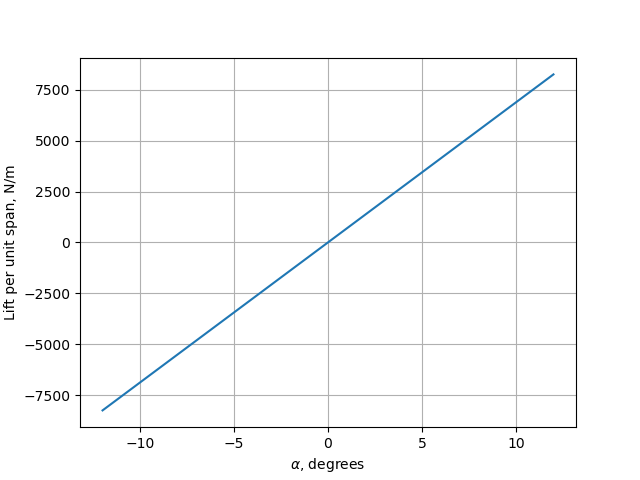

In [21]:
# Define air density, speed, and chord
rho = 1.225  # kg/m^3
v = 80       # m/s
c = 1.6      # m

# Calculate dynamic pressure
q = 0.5 * rho * v**2

# Calculate lift per unit span for each angle of attack
lift = q * c * c_l

# Create figure and plot lift vs angle of attack
plt.figure()
plt.plot(alpha_deg, lift)

# Add axis labels, grid, and show the plot
plt.xlabel('$\\alpha$, degrees')
plt.ylabel('Lift per unit span, N/m')
plt.grid(True)
plt.show()

Same linear relationship, but now in terms of lift force instead of lift coefficient. As you can see, typical lift values for an airfoil section can be in the order of thousands of Newtons per meter or more. Bear in mind that this is lift per unit span, as we are only considering a 2D section, and to obtain the total lift for a finite wing you would need to integrate along the span.

However, how does the lift curve look for a real airfoil? We can consider a NACA 0012 airfoil, which is relatively thin (remember, we are using thin airfoil theory), as its maximum thickness amounts to 12% of the chord length. By using the experimental results by Abbott and von Doenhoff available at [this source](https://turbmodels.larc.nasa.gov/naca0012_val.html), we can compare the thin airfoil theory predictions with real life data. Let's copy the $c_l$ data from the website, plot the lift curve and compare it with our previous thin airfoil theory approximation.

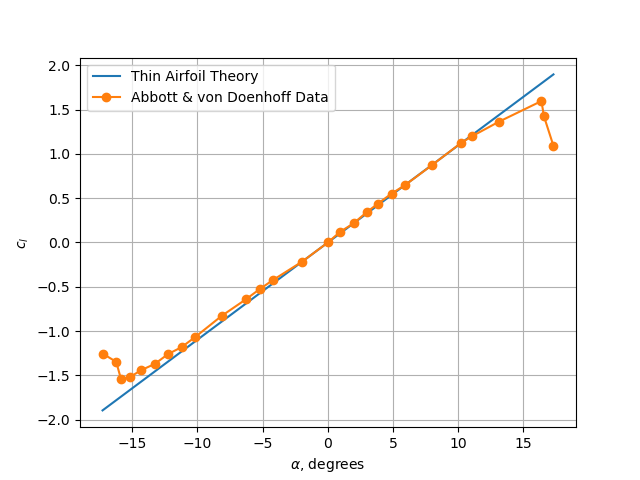

In [23]:
# Just defining an array here with the c_l vs alpha data from Abbott and von Doenhoff for a NACA 0012 airfoil
# Source: https://turbmodels.larc.nasa.gov/naca0012_val.html
abbott_doenhoff_data = np.array([[-17.2794, -1.25323],
                                 [-16.2296, -1.34704],
								 [-15.8616, -1.54416],
								 [-15.1713, -1.51805],
								 [-14.3133, -1.44038],
								 [-13.2811, -1.3712],
								 [-12.2535, -1.25912],
								 [-11.2222, -1.18135],
								 [-10.1947, -1.06927],
								 [-8.14138, -0.827958],
								 [-6.25579, -0.638207],
								 [-5.22822, -0.526128],
								 [-4.19972, -0.422627],
								 [-1.96944, -0.215533],
								 [0., 0.],
								 [0.940006, 0.120611],
								 [1.96944, 0.215533],
								 [2.99515, 0.34477],
								 [3.85131, 0.439599],
								 [4.87888, 0.551678],
								 [5.90831, 0.6466],
								 [7.96346, 0.870758],
								 [10.1891, 1.12074],
								 [11.0471, 1.19842],
								 [13.1088, 1.36252],
								 [16.3759, 1.59591],
								 [16.5678, 1.42443],
								 [17.2971, 1.09024]])

# Create figure and axes
# This time we use the subplots function to get access to the axes object, since we need to plot multiple curves
fig, ax = plt.subplots()

# Calculate thin airfoil theory lift coefficient
# This time we use the same range of angles as in the Abbott and von Doenhoff data for a better visual comparison
lift_thin_airfoil = c_l_alpha * np.radians(abbott_doenhoff_data[:, 0])

# Plot thin airfoil theory lift coefficient
ax.plot(abbott_doenhoff_data[:, 0], lift_thin_airfoil, label='Thin Airfoil Theory')

# Plot Abbott and von Doenhoff data
ax.plot(abbott_doenhoff_data[:, 0], abbott_doenhoff_data[:, 1], 'o-', label='Abbott & von Doenhoff Data')

# Add axis labels, legend, grid, and show the plot
ax.set_xlabel('$\\alpha$, degrees')
ax.set_ylabel('$c_l$')
ax.legend()
ax.grid(True)
plt.show()

As you can see from the plot, thin airfoil theory provides a good approximation of the lift curve for small angles of attack, but as we increase $\alpha$, the real airfoil starts to deviate from the linear behavior. This deviation starts occurring at about $\pm 13^\circ$, and then we an abrupt dropt in lift at about $\pm 16^\circ$. This is called stall and it is caused by flow separation over the airfoil, which cannot be captured by the linear theory.

We don't have to worry about stall for the content of this course, but it is always important to be aware of the limitations of the models we use. Remember that all models are wrong, but some are useful!

## 2. The Typical Section Model

---

To study aeroelastic behavior, we use a simple model called the **typical section**. The complete version of the typical section includes three degrees of freedom, but for this notebook, we'll focus on a simplified version with only **one degree of freedom**, corresponding to the **torsional rotation** or **pitch** degree of freedom, as you can see below.

<figure>
<img src="../figures/01_typical_section_pitch_dof.PNG" style="width:100%">
<figcaption align = "center"> Typical Section with Pitch Degree of Freedom, reproduced from [1]. </figcaption>
</figure>

### Key Components

Our typical section includes:

1. **Airfoil cross-section**: The 2D shape of the wing (viewed from the side)
2. **Chord ($c$)**: The distance from the leading edge to the trailing edge of the airfoil
3. **Elastic axis (EA)**: The point about which the section can rotate, restrained by a torsional spring
4. **Aerodynamic center (AC)**: The point where the lift force is applied (at the quarter-chord, $c/4$ from leading edge, for thin airfoils at low speeds)

### What is the Elastic Axis?

The **elastic axis** is the locus of shear centers along a wing. In turn, for each cross-section of the wing, the shear center is the position where there is zero rotation for a shear load applied to that cross-section. In other words, you can think of it as the "hinge line" for torsional rotation.

In our model, we restrain this rotation with a **torsional spring** of stiffness $k_\theta$ (units: Nm/rad), representing the wing's resistance to twisting. As you will see, the position of the elastic axis relative to the aerodynamic center is crucial for determining the aeroelastic behavior of the typical section. In real wings, the location and the meaning of the elastic axis is a more complex topic (you can read more about it in [2]).

We define the nondimensional distance $e$ between the elastic axis and the aerodynamic center as the physical distance divided by the chord length.

**Important:** When $e > 0$, the lift acts **ahead** of the elastic axis. This configuration, as we'll see, can lead to interesting (and potentially dangerous) behavior.

## 3. The Aeroelastic Coupling

---

Now here's where aeroelasticity enters the picture.

### Two Angles

We need to distinguish between two angles:

1. **$\alpha_0$**: The **rigid angle of attack** - the angle the wing would have if it were perfectly stiff (no deformation)
2. **$\Theta$**: The **elastic twist angle** - the additional rotation caused by elastic deformation

The **total angle of attack** seen by the airflow is:

$$
\alpha = \alpha_0 + \Theta
$$

### The Feedback Loop

Here's what happens:

1. The pilot sets the wing at angle $\alpha_0$ (controls the aircraft)
2. Lift is generated: $L = q c c_{L\alpha} (\alpha_0 + \Theta)$
3. This lift creates a moment about the elastic axis
4. The moment causes the wing to twist by angle $\Theta$
5. This twist changes the angle of attack
6. The changed angle of attack changes the lift
7. Go back to step 3...

The system reaches **equilibrium** when all forces and moments balance.

---

## 4. Deriving the Equilibrium Equation

Let's find the equilibrium angle $\Theta$ using **moment balance** about the elastic axis.

### Step 1: Aerodynamic Moment

The lift $L$ acts at the quarter-chord point (aerodynamic center). The moment arm about the elastic axis is the distance $e$.

The aerodynamic moment about the elastic axis (nose-up positive) is:

$$
M_a = L \cdot e = q c c_{L\alpha} (\alpha_0 + \Theta) \cdot e
$$

We can rewrite this as:

$$
M_a = q \varepsilon_c c^2 c_{L\alpha} (\alpha_0 + \Theta)
$$

where $\varepsilon_c = e/c$.

**Sign convention:** 
- When $\varepsilon_c > 0$ (AC ahead of EA) and $\alpha > 0$: lift creates a **nose-up** moment (positive)
- This tends to **increase** $\Theta$ (positive twist)

### Step 2: Elastic Restoring Moment

The torsional spring provides a restoring moment:

$$
M_e = -k_\Theta \Theta
$$

The negative sign indicates that the spring **opposes** the rotation (restoring force).

**Physical interpretation:** 
- If $\Theta > 0$ (nose-up twist), the spring pushes nose-down
- Like a door closer that pushes the door back to its neutral position

### Step 3: Equilibrium Condition

At equilibrium, the sum of moments about the elastic axis is zero:

$$
M_a + M_e = 0
$$

$$
q \varepsilon_c c^2 c_{L\alpha} (\alpha_0 + \Theta) - k_\Theta \Theta = 0
$$

### Step 4: Solve for the Elastic Angle $\Theta$

Expanding:

$$
q \varepsilon_c c^2 c_{L\alpha} \alpha_0 + q \varepsilon_c c^2 c_{L\alpha} \Theta - k_\Theta \Theta = 0
$$

Collecting terms with $\Theta$:

$$
\Theta (q \varepsilon_c c^2 c_{L\alpha} - k_\Theta) = -q \varepsilon_c c^2 c_{L\alpha} \alpha_0
$$

Therefore:

$$
\boxed{\Theta = \frac{-q \varepsilon_c c^2 c_{L\alpha} \alpha_0}{q \varepsilon_c c^2 c_{L\alpha} - k_\Theta} = \frac{q \varepsilon_c c^2 c_{L\alpha}}{k_\Theta - q \varepsilon_c c^2 c_{L\alpha}} \alpha_0}
$$

This is our **fundamental aeroelastic equation** for the typical section!

### Understanding the Equation

Let's examine this result:

$$
\Theta = \frac{q \varepsilon_c c^2 c_{L\alpha}}{k_\Theta - q \varepsilon_c c^2 c_{L\alpha}} \alpha_0
$$

**Key observations:**

1. **Proportionality:** $\Theta$ is proportional to $\alpha_0$. Doubling the initial angle doubles the elastic twist.

2. **Speed dependence:** $\Theta$ depends on dynamic pressure $q = \frac{1}{2}\rho v^2$, so it increases with flight speed squared.

3. **The denominator matters:** 
   - At low speeds: $k_\Theta \gg q \varepsilon_c c^2 c_{L\alpha}$, so $\Theta \approx 0$ (rigid behavior)
   - As speed increases: denominator decreases, $\Theta$ increases
   - **What happens when the denominator approaches zero?** 🤔

4. **Sign of $\varepsilon_c$:**
   - If $\varepsilon_c > 0$ (AC ahead of EA): numerator and denominator have the same sign
   - If $\varepsilon_c < 0$ (AC behind EA): behavior is different (we'll explore this!)

---

## 5. Computational Implementation

Let's implement this equation in Python and explore the aeroelastic behavior.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

# Set up plotting style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

### Define Physical Parameters

Let's set up a realistic example for a small aircraft wing section.

In [2]:
# Geometric parameters
c = 1.5  # chord length [m]
epsilon_c = 0.15  # non-dimensional distance from EA to AC (positive: AC ahead of EA)
e = epsilon_c * c  # dimensional distance [m]

# Aerodynamic parameters
rho = 1.225  # air density at sea level [kg/m^3]
c_L_alpha = 2 * np.pi  # lift curve slope for thin airfoil [1/rad]

# Structural parameters
k_theta = 5e4  # torsional spring stiffness [Nm/rad]

# Flight condition
alpha_0_deg = 5.0  # rigid angle of attack [degrees]
alpha_0 = np.radians(alpha_0_deg)  # convert to radians

print("Physical Parameters:")
print(f"  Chord: c = {c} m")
print(f"  Elastic axis position: ε_c = {epsilon_c} (e = {e:.3f} m)")
print(f"  Air density: ρ = {rho} kg/m³")
print(f"  Lift curve slope: c_Lα = {c_L_alpha:.3f} rad⁻¹")
print(f"  Torsional stiffness: k_Θ = {k_theta:.1e} Nm/rad")
print(f"  Rigid angle of attack: α₀ = {alpha_0_deg}° = {alpha_0:.4f} rad")

Physical Parameters:
  Chord: c = 1.5 m
  Elastic axis position: ε_c = 0.15 (e = 0.225 m)
  Air density: ρ = 1.225 kg/m³
  Lift curve slope: c_Lα = 6.283 rad⁻¹
  Torsional stiffness: k_Θ = 5.0e+04 Nm/rad
  Rigid angle of attack: α₀ = 5.0° = 0.0873 rad


### Function to Calculate Elastic Twist

Let's create a function that computes $\Theta$ for a given dynamic pressure $q$.

In [3]:
def elastic_twist(q, epsilon_c, c, c_L_alpha, k_theta, alpha_0):
    """
    Calculate the elastic twist angle Theta for a given dynamic pressure.
    
    Parameters:
    -----------
    q : float or array
        Dynamic pressure [Pa]
    epsilon_c : float
        Non-dimensional distance from EA to AC [-]
    c : float
        Chord length [m]
    c_L_alpha : float
        Lift curve slope [1/rad]
    k_theta : float
        Torsional spring stiffness [Nm/rad]
    alpha_0 : float
        Rigid angle of attack [rad]
    
    Returns:
    --------
    Theta : float or array
        Elastic twist angle [rad]
    """
    
    numerator = q * epsilon_c * c**2 * c_L_alpha * alpha_0
    denominator = k_theta - q * epsilon_c * c**2 * c_L_alpha
    
    # Avoid division by zero
    if np.any(np.abs(denominator) < 1e-6):
        print("Warning: Denominator approaching zero - near critical condition!")
    
    Theta = numerator / denominator
    
    return Theta

def velocity_to_dynamic_pressure(v, rho):
    """
    Convert velocity to dynamic pressure.
    
    Parameters:
    -----------
    v : float or array
        Velocity [m/s]
    rho : float
        Air density [kg/m^3]
    
    Returns:
    --------
    q : float or array
        Dynamic pressure [Pa]
    """
    return 0.5 * rho * v**2

def dynamic_pressure_to_velocity(q, rho):
    """
    Convert dynamic pressure to velocity.
    
    Parameters:
    -----------
    q : float or array
        Dynamic pressure [Pa]
    rho : float
        Air density [kg/m^3]
    
    Returns:
    --------
    v : float or array
        Velocity [m/s]
    """
    return np.sqrt(2 * q / rho)

print("Functions defined successfully!")

Functions defined successfully!


---

## 6. The Aeroelastic Polar: Visualizing $\Theta$ vs. $q$

Let's compute and plot how the elastic twist angle varies with flight speed (or equivalently, dynamic pressure). This curve is called the **aeroelastic polar**.

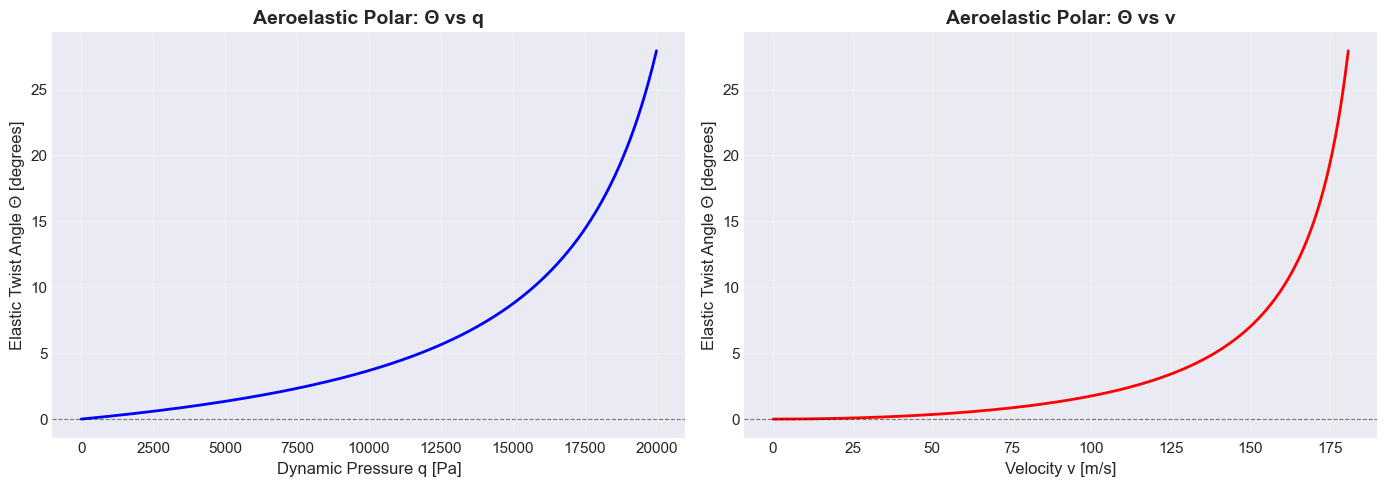


For α₀ = 5.0° and ε_c = 0.15:
  At v = 50 m/s (q = 1531.2 Pa): Θ = 0.347°
  At v = 100 m/s (q = 6125.0 Pa): Θ = 1.755°


In [4]:
# Create range of dynamic pressures
q_array = np.linspace(0, 20000, 500)  # [Pa]
v_array = dynamic_pressure_to_velocity(q_array, rho)  # [m/s]

# Calculate elastic twist for each dynamic pressure
Theta_array = elastic_twist(q_array, epsilon_c, c, c_L_alpha, k_theta, alpha_0)

# Convert to degrees for plotting
Theta_array_deg = np.degrees(Theta_array)

# Create the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Theta vs dynamic pressure
ax1.plot(q_array, Theta_array_deg, 'b-', linewidth=2)
ax1.axhline(y=0, color='k', linestyle='--', linewidth=0.8, alpha=0.5)
ax1.set_xlabel('Dynamic Pressure q [Pa]', fontsize=12)
ax1.set_ylabel('Elastic Twist Angle Θ [degrees]', fontsize=12)
ax1.set_title('Aeroelastic Polar: Θ vs q', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Theta vs velocity
ax2.plot(v_array, Theta_array_deg, 'r-', linewidth=2)
ax2.axhline(y=0, color='k', linestyle='--', linewidth=0.8, alpha=0.5)
ax2.set_xlabel('Velocity v [m/s]', fontsize=12)
ax2.set_ylabel('Elastic Twist Angle Θ [degrees]', fontsize=12)
ax2.set_title('Aeroelastic Polar: Θ vs v', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nFor α₀ = {alpha_0_deg}° and ε_c = {epsilon_c}:")
print(f"  At v = 50 m/s (q = {velocity_to_dynamic_pressure(50, rho):.1f} Pa): Θ = {np.degrees(elastic_twist(velocity_to_dynamic_pressure(50, rho), epsilon_c, c, c_L_alpha, k_theta, alpha_0)):.3f}°")
print(f"  At v = 100 m/s (q = {velocity_to_dynamic_pressure(100, rho):.1f} Pa): Θ = {np.degrees(elastic_twist(velocity_to_dynamic_pressure(100, rho), epsilon_c, c, c_L_alpha, k_theta, alpha_0)):.3f}°")

### Interpretation

What do we observe?

1. **At low speeds:** $\Theta \approx 0$. The wing behaves almost rigidly.

2. **As speed increases:** $\Theta$ increases (for $\varepsilon_c > 0$ and $\alpha_0 > 0$).
   - The aerodynamic moment becomes stronger
   - The wing twists more

3. **Non-linear growth:** The curve is not a straight line! As $q$ increases, $\Theta$ grows faster and faster.
   - This is the **aeroelastic coupling** at work
   - More twist → more lift → more moment → even more twist

4. **Question:** What happens if we keep increasing the speed? Does $\Theta$ keep growing? Or is there a limit?

We'll answer this critical question in the next notebook! ⚠️

---

## 7. Interactive Exploration: Effect of Parameters

Let's create an interactive tool to explore how different parameters affect the aeroelastic polar.

In [5]:
def plot_aeroelastic_polar_interactive(epsilon_c_val, k_theta_val, alpha_0_deg_val):
    """
    Interactive plot of aeroelastic polar with adjustable parameters.
    """
    
    alpha_0_val = np.radians(alpha_0_deg_val)
    
    # Range of dynamic pressures
    q_max = 25000
    q_array = np.linspace(0, q_max, 500)
    
    # Calculate elastic twist
    try:
        Theta_array = elastic_twist(q_array, epsilon_c_val, c, c_L_alpha, k_theta_val, alpha_0_val)
        Theta_array_deg = np.degrees(Theta_array)
        v_array = dynamic_pressure_to_velocity(q_array, rho)
        
        # Create plot
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.plot(q_array, Theta_array_deg, 'b-', linewidth=2.5)
        ax.axhline(y=0, color='k', linestyle='--', linewidth=0.8, alpha=0.5)
        ax.set_xlabel('Dynamic Pressure q [Pa]', fontsize=12)
        ax.set_ylabel('Elastic Twist Angle Θ [degrees]', fontsize=12)
        ax.set_title(f'Aeroelastic Polar (ε_c = {epsilon_c_val:.2f}, k_Θ = {k_theta_val:.1e} Nm/rad, α₀ = {alpha_0_deg_val}°)', 
                     fontsize=13, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.set_xlim([0, q_max])
        
        # Add secondary x-axis for velocity
        ax2 = ax.twiny()
        ax2.set_xlim([0, dynamic_pressure_to_velocity(q_max, rho)])
        ax2.set_xlabel('Velocity v [m/s]', fontsize=11, color='darkred')
        ax2.tick_params(axis='x', labelcolor='darkred')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error in calculation: {e}")
        print("This might happen near critical conditions.")

# Create interactive widget
interact(plot_aeroelastic_polar_interactive,
         epsilon_c_val=FloatSlider(value=0.15, min=-0.3, max=0.3, step=0.05, 
                                   description='ε_c:', continuous_update=False),
         k_theta_val=FloatSlider(value=5e4, min=1e4, max=1e5, step=5e3, 
                                 description='k_Θ [Nm/rad]:', continuous_update=False,
                                 readout_format='.1e'),
         alpha_0_deg_val=FloatSlider(value=5.0, min=0, max=10, step=1, 
                                    description='α₀ [deg]:', continuous_update=False));

interactive(children=(FloatSlider(value=0.15, continuous_update=False, description='ε_c:', max=0.3, min=-0.3, …

### Exercise: Explore the Parameter Space

Use the interactive plot above to answer these questions:

1. **Effect of $\varepsilon_c$:**
   - What happens when $\varepsilon_c = 0$ (elastic axis at the quarter-chord)?
   - What happens when $\varepsilon_c < 0$ (elastic axis ahead of the quarter-chord)?
   - Compare the behavior for $\varepsilon_c = +0.15$ vs. $\varepsilon_c = -0.15$

2. **Effect of $k_\Theta$:**
   - How does increasing the torsional stiffness affect the elastic twist?
   - What happens with a very soft spring (low $k_\Theta$)?

3. **Effect of $\alpha_0$:**
   - Is the relationship between $\alpha_0$ and $\Theta$ linear?
   - What happens at $\alpha_0 = 0$?

**Think about:** Which parameter has the most dramatic effect on the aeroelastic behavior?

---

## 8. Two Fundamentally Different Cases

Let's examine the two cases more carefully by plotting them side-by-side.

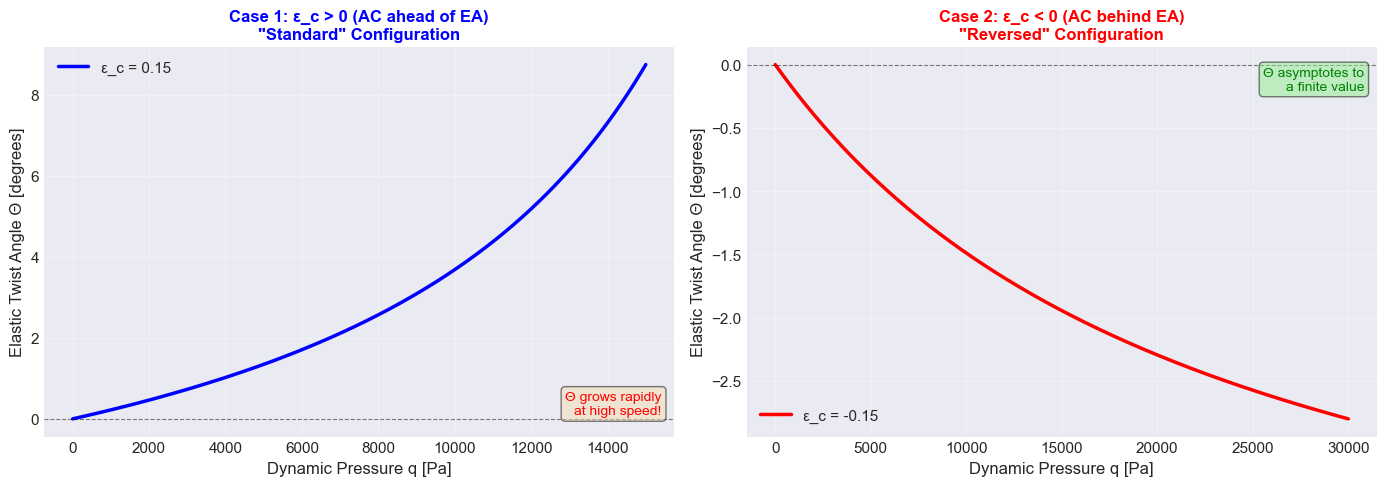


Comparison of Two Cases:

Case 1 (ε_c > 0): Aerodynamic center AHEAD of elastic axis
  - Positive feedback: twist increases lift moment, increasing twist further
  - Θ grows rapidly at high speed
  - Question: Is there a speed where Θ → ∞? 🤔

Case 2 (ε_c < 0): Aerodynamic center BEHIND elastic axis
  - Negative feedback: twist decreases lift moment, stabilizing the system
  - Θ approaches a finite limiting value
  - This configuration is inherently stable (but aerodynamically inefficient)


In [6]:
# Case 1: epsilon_c > 0 (AC ahead of EA - typical configuration)
epsilon_c_positive = 0.15
q_array_1 = np.linspace(0, 15000, 500)
Theta_array_1 = elastic_twist(q_array_1, epsilon_c_positive, c, c_L_alpha, k_theta, alpha_0)

# Case 2: epsilon_c < 0 (AC behind EA - unconventional)
epsilon_c_negative = -0.15
q_array_2 = np.linspace(0, 30000, 500)
Theta_array_2 = elastic_twist(q_array_2, epsilon_c_negative, c, c_L_alpha, k_theta, alpha_0)

# Create comparison plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot Case 1: epsilon_c > 0
axes[0].plot(q_array_1, np.degrees(Theta_array_1), 'b-', linewidth=2.5, label=f'ε_c = {epsilon_c_positive}')
axes[0].axhline(y=0, color='k', linestyle='--', linewidth=0.8, alpha=0.5)
axes[0].set_xlabel('Dynamic Pressure q [Pa]', fontsize=12)
axes[0].set_ylabel('Elastic Twist Angle Θ [degrees]', fontsize=12)
axes[0].set_title('Case 1: ε_c > 0 (AC ahead of EA)\n"Standard" Configuration', 
                  fontsize=12, fontweight='bold', color='blue')
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=11)
axes[0].text(0.98, 0.05, 'Θ grows rapidly\nat high speed!', 
             transform=axes[0].transAxes, fontsize=10, color='red',
             ha='right', va='bottom', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Plot Case 2: epsilon_c < 0
axes[1].plot(q_array_2, np.degrees(Theta_array_2), 'r-', linewidth=2.5, label=f'ε_c = {epsilon_c_negative}')
axes[1].axhline(y=0, color='k', linestyle='--', linewidth=0.8, alpha=0.5)
axes[1].set_xlabel('Dynamic Pressure q [Pa]', fontsize=12)
axes[1].set_ylabel('Elastic Twist Angle Θ [degrees]', fontsize=12)
axes[1].set_title('Case 2: ε_c < 0 (AC behind EA)\n"Reversed" Configuration', 
                  fontsize=12, fontweight='bold', color='red')
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=11)
axes[1].text(0.98, 0.95, 'Θ asymptotes to\na finite value', 
             transform=axes[1].transAxes, fontsize=10, color='green',
             ha='right', va='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.tight_layout()
plt.show()

print("\nComparison of Two Cases:")
print("\nCase 1 (ε_c > 0): Aerodynamic center AHEAD of elastic axis")
print("  - Positive feedback: twist increases lift moment, increasing twist further")
print("  - Θ grows rapidly at high speed")
print("  - Question: Is there a speed where Θ → ∞? 🤔")
print("\nCase 2 (ε_c < 0): Aerodynamic center BEHIND elastic axis")
print("  - Negative feedback: twist decreases lift moment, stabilizing the system")
print("  - Θ approaches a finite limiting value")
print("  - This configuration is inherently stable (but aerodynamically inefficient)")

### Physical Interpretation

The sign of $\varepsilon_c$ determines the **feedback character**:

#### Case 1: $\varepsilon_c > 0$ (AC ahead of EA)

**Positive feedback loop:**
1. Wing twists nose-up ($\Theta > 0$)
2. Angle of attack increases: $\alpha = \alpha_0 + \Theta$ increases
3. Lift increases
4. Since lift acts ahead of EA, moment increases
5. Even more nose-up twist → back to step 1

This is a **divergent** (unstable) feedback loop! 🔄⚠️

#### Case 2: $\varepsilon_c < 0$ (AC behind EA)

**Negative feedback loop:**
1. Wing twists nose-up ($\Theta > 0$)
2. Angle of attack increases: $\alpha = \alpha_0 + \Theta$ increases
3. Lift increases
4. Since lift acts behind EA, this creates a **nose-down** moment
5. The nose-down moment opposes the twist
6. System stabilizes ✓

This is a **convergent** (stable) feedback loop, but it's aerodynamically inefficient (AC typically wants to be at c/4).

---

## 9. Summary and Key Takeaways

In this notebook, we've learned:

1. **The typical section model** represents a wing slice with:
   - Torsional degree of freedom
   - Elastic axis (rotation point with spring)
   - Aerodynamic forces (lift at quarter-chord)

2. **Aeroelastic coupling** creates a feedback between:
   - Aerodynamic forces → structural deformation
   - Structural deformation → changed aerodynamics

3. **The equilibrium equation:**
   $$\Theta = \frac{q \varepsilon_c c^2 c_{L\alpha}}{k_\Theta - q \varepsilon_c c^2 c_{L\alpha}} \alpha_0$$
   
4. **The aeroelastic polar** shows how $\Theta$ varies with flight speed

5. **Two cases:**
   - $\varepsilon_c > 0$: Positive feedback, rapid growth of $\Theta$
   - $\varepsilon_c < 0$: Negative feedback, stable behavior

6. **The critical question:** For $\varepsilon_c > 0$, what happens at high speeds when the denominator approaches zero?

### Looking Ahead: Torsional Divergence

We've seen that for $\varepsilon_c > 0$ (the typical configuration), the elastic twist grows rapidly with speed. 

**Next notebook:** We'll investigate what happens when:
$$k_\Theta - q \varepsilon_c c^2 c_{L\alpha} = 0$$

This critical condition defines the **divergence speed** - a fundamental aeroelastic instability that has caused catastrophic failures in aircraft history.

**Preview question to think about:**
- What do you think happens to the wing structure when $\Theta \to \infty$?
- How fast can we fly before reaching this critical condition?
- How do aircraft designers prevent this from happening?

---

### References for Further Reading

[1] Wright, J. R., & Cooper, J. E. (2007). *Introduction to Aircraft Aeroelasticity and Loads*. John Wiley & Sons.

[2] Interpretation of Bending/Torsion Coupling for Swept, Nonhomogenous Wings. O. Stodieck, J. E. Cooper, and P. M. Weaver. Journal of Aircraft 2016 53:4, 892-899

---

**End of Notebook 1** ✓

*Continue to Notebook 2: Torsional Divergence*